In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("IIoTDataset.csv")
df

C:\Users\prans\AppData\Local\Temp\ipykernel_1564\2235453044.py:1: DtypeWarning: Columns (1,3,5,12,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\Suppose to be in D\Research\IIoTDataset.csv")


In [ ]:
df.drop(df.columns[[0, 2, 4, 11, 21]], axis=1, inplace=True)

df.replace("?", "-", inplace=True)

df = df[~df.isin(['-']).any(axis=1)]

In [ ]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['Service'] = encoder.fit_transform(df['Service'])
df['Protocol'] = encoder.fit_transform(df['Protocol'])
df['class1'] = encoder.fit_transform(df['class1'])
df['class2'] = encoder.fit_transform(df['class2'])
df['class3'] = encoder.fit_transform(df['class3'])
df

C:\Users\prans\AppData\Local\Temp\ipykernel_1564\797957612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Service'] = encoder.fit_transform(df['Service'])
C:\Users\prans\AppData\Local\Temp\ipykernel_1564\797957612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Protocol'] = encoder.fit_transform(df['Protocol'])
C:\Users\prans\AppData\Local\Temp\ipykernel_1564\797957612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Timestamp,Scr_port,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,missed_bytes,is_syn_only,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,1578540956,49278,80,1,4,0.67369,13437,34924,0,True,...,5,0,0,0,0,0,0,13,6,0
1,1578871873,39769,53,2,2,0.000083,78,0,0,False,...,0,0,0,0,0,0,0,10,4,1
2,1578522486,59050,53,2,2,0.000132,38,38,0,False,...,0,0,0,0,0,0,0,10,4,1
3,1582757640,37966,1880,1,16,9.378481,1121,484,0,True,...,0,1,1,1,1,1,1,10,4,1
5,1580452611,50502,80,1,4,5.153928,460,671,0,True,...,0,0,0,0,0,1,0,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820827,1579041266.0,51292,80,1,4,0.205832,127,310,0,True,...,5,0,0,0,0,0,0,0,8,0
820830,1579653575.0,45913,1880,1,16,63.290477,0,0,0,True,...,0,0,0,0,0,0,0,10,4,1
820831,1579064398.0,53252,80,1,4,14.787547,26091,604398,0,True,...,0,0,0,0,0,1,0,10,4,1
820832,1578374864.0,44451,19315,1,11,0.000011,0,0,0,True,...,0,0,0,0,0,0,0,6,6,0


In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Select the columns with object data type
object_columns = data_types[data_types == 'object'].index.tolist()

# Print the object columns
print(object_columns)


['Timestamp', 'Scr_port', 'Des_port', 'Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time', 'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time', 'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps', 'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused', 'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s', 'std_num_cswch/s']


In [ ]:
import numpy as np

# Convert all bool dtypes to 0 and 1
df = df.applymap(lambda x: 1 if x == True else 0 if x == False else x)

# Remove those tuples that can't be converted
df = df[df.applymap(lambda x: type(x) != tuple)]

# Print the updated DataFrame
print(df)


           Timestamp Scr_port Des_port  Protocol  Service   Duration  \
0         1578540956    49278       80         1        4    0.67369   
1         1578871873    39769       53         2        2   0.000083   
2         1578522486    59050       53         2        2   0.000132   
3         1582757640    37966     1880         1       16   9.378481   
5         1580452611    50502       80         1        4   5.153928   
...              ...      ...      ...       ...      ...        ...   
820827  1579041266.0    51292       80         1        4   0.205832   
820830  1579653575.0    45913     1880         1       16  63.290477   
820831  1579064398.0    53252       80         1        4  14.787547   
820832  1578374864.0    44451    19315         1       11   0.000011   
820833  1576459118.0    33903       53         2        2   0.000004   

       Scr_bytes Des_bytes missed_bytes  is_syn_only  ...  OSSEC_alert_level  \
0          13437     34924            0            1  .

In [ ]:
import pandas as pd

# Convert all object columns to numeric
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        # Remove columns that can't be converted
        df.drop(columns=[col], inplace=True)

# Print the updated DataFrame
print(df)


           Timestamp  Scr_port  Des_port  Protocol  Service   Duration  \
0       1.578541e+09     49278        80         1        4   0.673690   
1       1.578872e+09     39769        53         2        2   0.000083   
2       1.578522e+09     59050        53         2        2   0.000132   
3       1.582758e+09     37966      1880         1       16   9.378481   
5       1.580453e+09     50502        80         1        4   5.153928   
...              ...       ...       ...       ...      ...        ...   
820827  1.579041e+09     51292        80         1        4   0.205832   
820830  1.579654e+09     45913      1880         1       16  63.290477   
820831  1.579064e+09     53252        80         1        4  14.787547   
820832  1.578375e+09     44451     19315         1       11   0.000011   
820833  1.576459e+09     33903        53         2        2   0.000004   

        Scr_bytes  Des_bytes  missed_bytes  is_syn_only  ...  \
0           13437      34924             0     

In [ ]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

Timestamp: float64
Scr_port: int64
Des_port: int64
Protocol: int64
Service: int64
Duration: float64
Scr_bytes: int64
Des_bytes: int64
missed_bytes: int64
is_syn_only: int64
Is_SYN_ACK: int64
is_pure_ack: int64
is_with_payload: int64
FIN or RST: int64
Scr_pkts: int64
Scr_ip_bytes: int64
Des_pkts: int64
total_bytes: int64
total_packet: int64
paket_rate: float64
byte_rate: float64
Scr_packts_ratio: float64
Des_pkts_ratio: float64
Scr_bytes_ratio: float64
Des_bytes_ratio: float64
Std_user_time: float64
Avg_nice_time: float64
Std_nice_time: float64
Avg_system_time: float64
Std_system_time: float64
Avg_iowait_time: float64
Std_iowait_time: float64
Avg_ideal_time: float64
Std_ideal_time: float64
Avg_tps: float64
Std_tps: float64
Avg_rtps: float64
Std_rtps: float64
Avg_wtps: float64
Std_wtps: float64
Avg_ldavg_1: float64
Std_ldavg_1: float64
Avg_num_Proc/s: float64
Std_num_proc/s: float64
Avg_num_cswch/s: float64
std_num_cswch/s: float64
OSSEC_alert: int64
OSSEC_alert_level: int64
Login_attemp

In [ ]:
df.shape

(596558, 57)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:

null_values = df.isnull().sum()

print(null_values)


Timestamp                      20
Scr_port                        0
Des_port                        0
Protocol                        0
Service                         0
Duration                        0
Scr_bytes                       0
Des_bytes                       0
missed_bytes                    0
is_syn_only                     0
Is_SYN_ACK                      0
is_pure_ack                     0
is_with_payload                 0
FIN or RST                      0
Scr_pkts                        0
Scr_ip_bytes                    0
Des_pkts                        0
total_bytes                     0
total_packet                    0
paket_rate                      0
byte_rate                       0
Scr_packts_ratio                0
Des_pkts_ratio                  0
Scr_bytes_ratio                 0
Des_bytes_ratio                 0
Std_user_time                   0
Avg_nice_time                   0
Std_nice_time                   0
Avg_system_time                 0
Std_system_tim

In [ ]:

df = df.dropna()


In [ ]:

import random

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Split the dataframe into 5 parts
df_parts = np.array_split(df, 5)

# Save each part to a CSV file
for i, df_part in enumerate(df_parts):
    df_part.to_csv(f'device_{i+1}.csv', index=False)


c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 10, Test loss for device_1.csv: 476.0742319226265, Test accuracy: 0.9133769172743273, Execution time: 304.2494878768921 seconds


c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 20, Test loss for device_1.csv: 476.0703582763672, Test accuracy: 0.9133769172743273, Execution time: 487.1109118461609 seconds
Epochs: 30, Test loss for device_1.csv: 476.070593893528, Test accuracy: 0.9133769172743273, Execution time: 543.388304233551 seconds
Epochs: 50, Test loss for device_1.csv: 476.0721700191498, Test accuracy: 0.9133769172743273, Execution time: 748.2314209938049 seconds


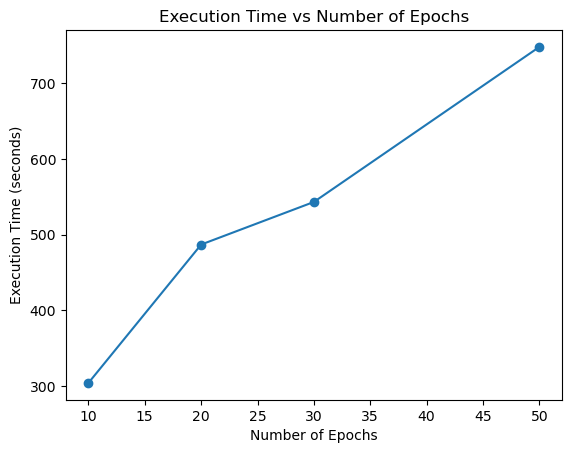

c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 10, Test loss for device_2.csv: 474.08120650053024, Test accuracy: 0.9159332830441707, Execution time: 82.96816158294678 seconds
Epochs: 20, Test loss for device_2.csv: 474.0833691358566, Test accuracy: 0.9159332830441707, Execution time: 184.8611581325531 seconds
Epochs: 30, Test loss for device_2.csv: 474.08106142282486, Test accuracy: 0.9159332830441707, Execution time: 440.8431017398834 seconds
Epochs: 50, Test loss for device_2.csv: 474.0812522172928, Test accuracy: 0.9159332830441707, Execution time: 1448.3801662921906 seconds


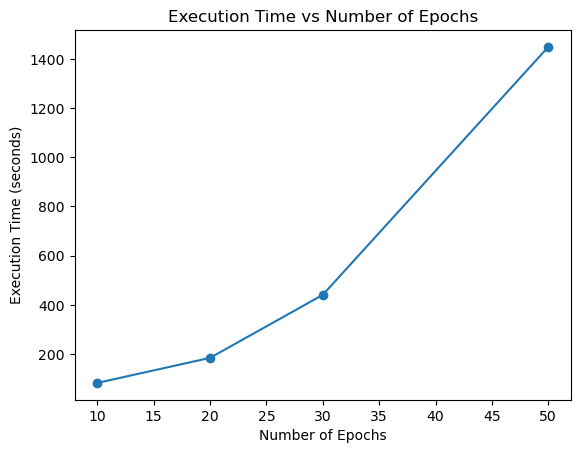

c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 10, Test loss for device_3.csv: 476.11213904619217, Test accuracy: 0.9132092867320426, Execution time: 396.8644814491272 seconds
Epochs: 20, Test loss for device_3.csv: 476.1115854382515, Test accuracy: 0.9132092867320426, Execution time: 772.015053987503 seconds
Epochs: 30, Test loss for device_3.csv: 476.1144208908081, Test accuracy: 0.9132092867320426, Execution time: 71096.58162760735 seconds
Epochs: 50, Test loss for device_3.csv: 476.1111504435539, Test accuracy: 0.9132092867320426, Execution time: 495.23572397232056 seconds


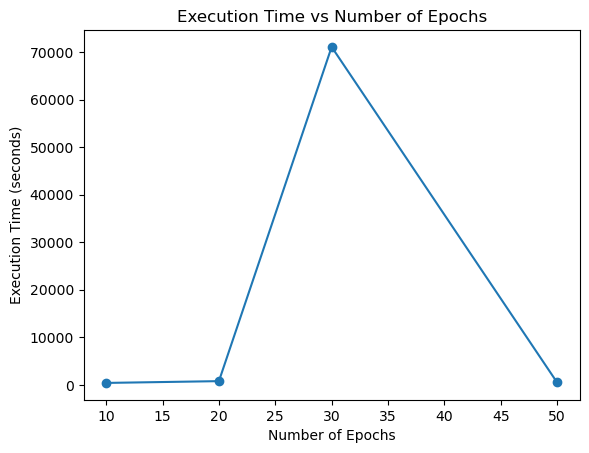

c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 10, Test loss for device_4.csv: 474.9065223932266, Test accuracy: 0.9148436845193194, Execution time: 74.60263204574585 seconds
Epochs: 20, Test loss for device_4.csv: 474.90522015094757, Test accuracy: 0.9148436845193194, Execution time: 157.80011415481567 seconds
Epochs: 30, Test loss for device_4.csv: 474.905918776989, Test accuracy: 0.9148436845193194, Execution time: 242.6698396205902 seconds
Epochs: 50, Test loss for device_4.csv: 474.9063124656677, Test accuracy: 0.9148436845193194, Execution time: 396.59212589263916 seconds


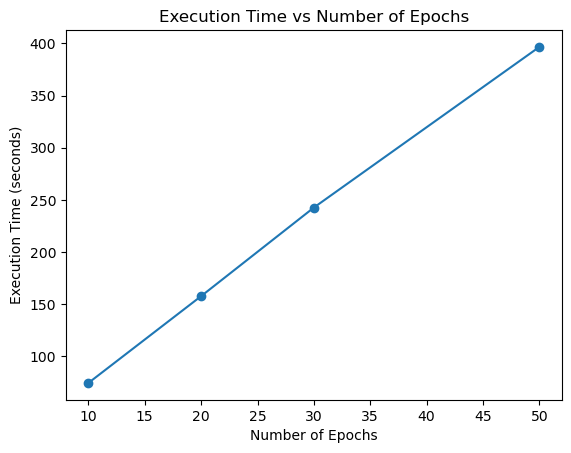

c:\Users\prans\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epochs: 10, Test loss for device_5.csv: 474.5780797600746, Test accuracy: 0.9153046685106027, Execution time: 81.32888054847717 seconds
Epochs: 20, Test loss for device_5.csv: 474.5765261054039, Test accuracy: 0.9153046685106027, Execution time: 162.60317945480347 seconds
Epochs: 30, Test loss for device_5.csv: 474.5785278081894, Test accuracy: 0.9153046685106027, Execution time: 246.47201466560364 seconds
Epochs: 50, Test loss for device_5.csv: 474.58068549633026, Test accuracy: 0.9153046685106027, Execution time: 406.7168548107147 seconds


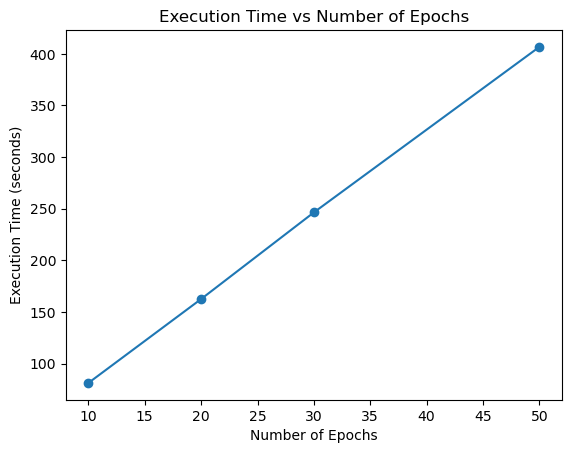

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import time

device_files = ['device_1.csv', 'device_2.csv', 'device_3.csv', 'device_4.csv', 'device_5.csv']

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size2, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

# Training parameters
learning_rate = 0.001
batch_size = 32

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for device_file in device_files:
    # Read data from CSV
    df = pd.read_csv(device_file)

    # Separate features and labels
    labels = torch.tensor(df[['class1', 'class2', 'class3']].values, dtype=torch.float32)
    features = torch.tensor(df.drop(['class1', 'class2', 'class3'], axis=1).values, dtype=torch.float32)

    # Normalize the features
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features.numpy())
    features_scaled = torch.tensor(features_scaled, dtype=torch.float32)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

    # Reshape the data for LSTM input
    X_train = X_train.view(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.view(X_test.shape[0], 1, X_test.shape[1])

    # Create DataLoader for training and test sets
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Build the LSTM model
    input_size = X_train.shape[2]
    hidden_size1 = 30
    hidden_size2 = 15
    output_size = 3

    # Initialize variables to store results
    epoch_list = [10, 20, 30, 50]
    execution_times = []

    for epochs in epoch_list:
        model = LSTMModel(input_size, hidden_size1, hidden_size2, output_size).to(device)

        # Loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

        start_time = time.time()

        # Train the model
        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0

            for i, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == torch.argmax(labels, dim=1)).sum().item()

        # Evaluate the model on the test set
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

        accuracy = correct / total
        execution_time = time.time() - start_time
        execution_times.append(execution_time)

        print(f'Epochs: {epochs}, Test loss for {device_file}: {test_loss}, Test accuracy: {accuracy}, Execution time: {execution_time} seconds')

    # Save the execution times for plotting
    import matplotlib.pyplot as plt

    plt.plot(epoch_list, execution_times, marker='o')
    plt.title('Execution Time vs Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


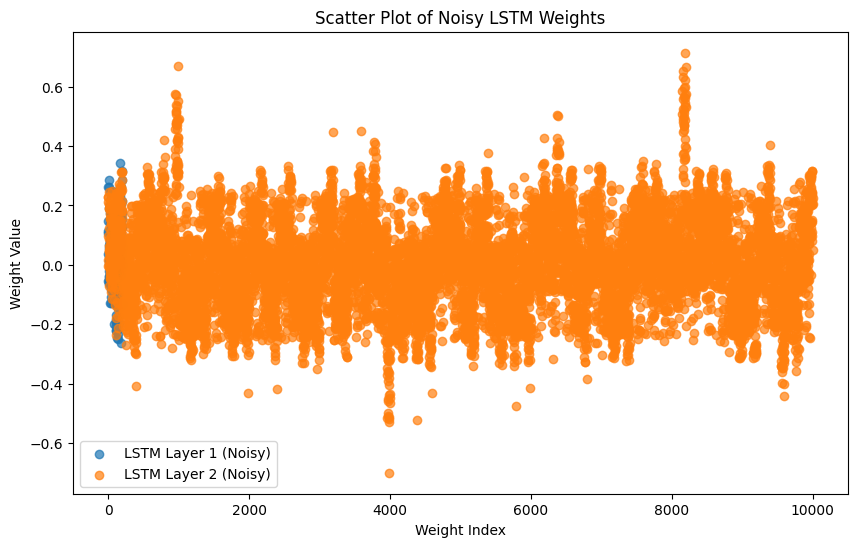

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

# Load the weights from the saved model file
model.load_weights('model_weights_device_1.csv.h5')

# Get the weights of the LSTM layers
lstm_layer1_weights = model.layers[0].get_weights()[0]  # Weights of the first LSTM layer
lstm_layer2_weights = model.layers[1].get_weights()[0]  # Weights of the second LSTM layer

# Add noise to the weights
noise_factor = 0.01  # You can adjust this factor based on the amount of noise you want
lstm_layer1_weights_noisy = lstm_layer1_weights + noise_factor * np.random.normal(size=lstm_layer1_weights.shape)
lstm_layer2_weights_noisy = lstm_layer2_weights + noise_factor * np.random.normal(size=lstm_layer2_weights.shape)

# Flatten the noisy weights for scatter plot
lstm_layer1_weights_flat_noisy = lstm_layer1_weights_noisy.flatten()
lstm_layer2_weights_flat_noisy = lstm_layer2_weights_noisy.flatten()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(lstm_layer1_weights_flat_noisy)), lstm_layer1_weights_flat_noisy, label='LSTM Layer 1 (Noisy)', alpha=0.7)
plt.scatter(np.arange(len(lstm_layer2_weights_flat_noisy)), lstm_layer2_weights_flat_noisy, label='LSTM Layer 2 (Noisy)', alpha=0.7)

plt.title('Scatter Plot of Noisy LSTM Weights')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.legend()
plt.show()


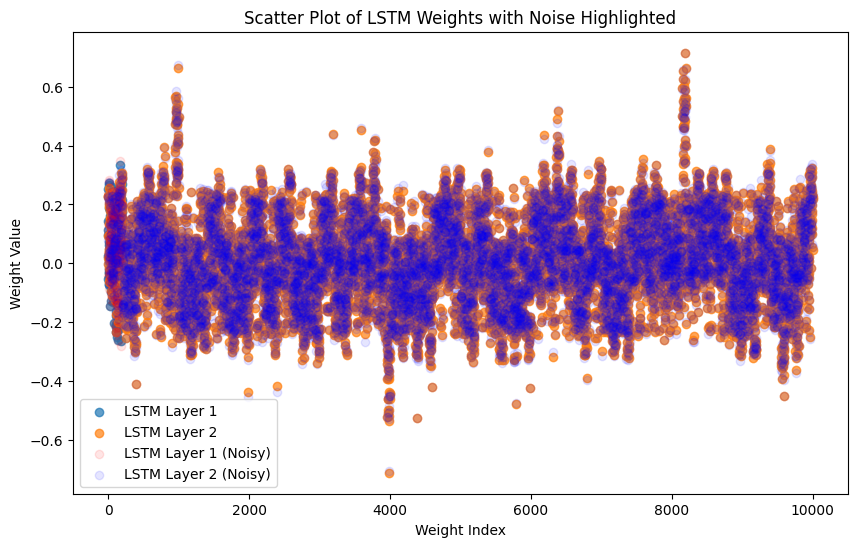

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

# Load the weights from the saved model file
model.load_weights('model_weights_device_1.csv.h5')

# Get the weights of the LSTM layers
lstm_layer1_weights = model.layers[0].get_weights()[0]  # Weights of the first LSTM layer
lstm_layer2_weights = model.layers[1].get_weights()[0]  # Weights of the second LSTM layer

# Add noise to the weights
noise_factor = 0.01  # You can adjust this factor based on the amount of noise you want
lstm_layer1_weights_noisy = lstm_layer1_weights + noise_factor * np.random.normal(size=lstm_layer1_weights.shape)
lstm_layer2_weights_noisy = lstm_layer2_weights + noise_factor * np.random.normal(size=lstm_layer2_weights.shape)

# Flatten the weights for scatter plot
lstm_layer1_weights_flat = lstm_layer1_weights.flatten()
lstm_layer2_weights_flat = lstm_layer2_weights.flatten()
lstm_layer1_weights_flat_noisy = lstm_layer1_weights_noisy.flatten()
lstm_layer2_weights_flat_noisy = lstm_layer2_weights_noisy.flatten()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(lstm_layer1_weights_flat)), lstm_layer1_weights_flat, label='LSTM Layer 1', alpha=0.7)
plt.scatter(np.arange(len(lstm_layer2_weights_flat)), lstm_layer2_weights_flat, label='LSTM Layer 2', alpha=0.7)

# Highlight noisy weights with a different color
plt.scatter(np.arange(len(lstm_layer1_weights_flat_noisy)), lstm_layer1_weights_flat_noisy, label='LSTM Layer 1 (Noisy)', alpha=0.1, c='red')
plt.scatter(np.arange(len(lstm_layer2_weights_flat_noisy)), lstm_layer2_weights_flat_noisy, label='LSTM Layer 2 (Noisy)', alpha=0.1, c='blue')

plt.title('Scatter Plot of LSTM Weights with Noise Highlighted')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.legend()
plt.show()


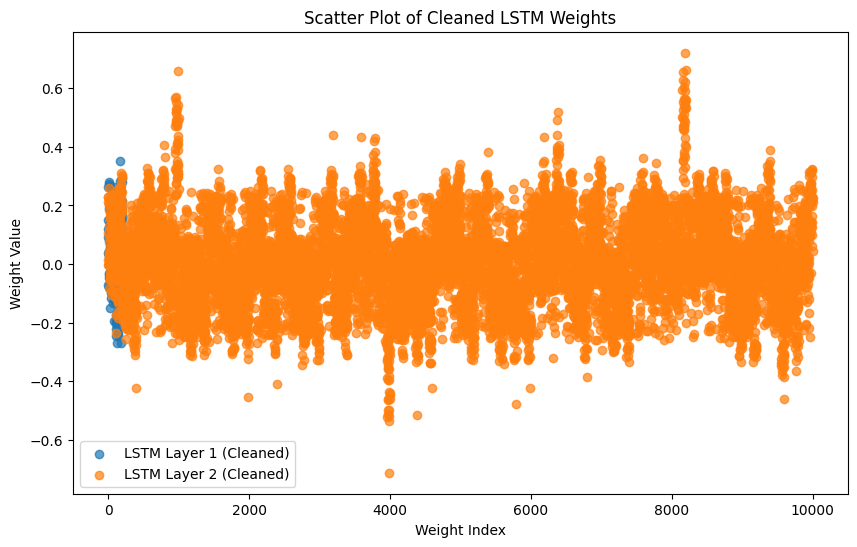

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from keras.models import load_model

# Load the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(3, activation='softmax'))

# Load the weights from the saved model file
model.load_weights('model_weights_device_1.csv.h5')

# Get the weights of the LSTM layers
lstm_layer1_weights = model.layers[0].get_weights()[0]  # Weights of the first LSTM layer
lstm_layer2_weights = model.layers[1].get_weights()[0]  # Weights of the second LSTM layer

# Add noise to the weights
noise_factor = 0.01  # You can adjust this factor based on the amount of noise you want
lstm_layer1_weights_noisy = lstm_layer1_weights + noise_factor * np.random.normal(size=lstm_layer1_weights.shape)
lstm_layer2_weights_noisy = lstm_layer2_weights + noise_factor * np.random.normal(size=lstm_layer2_weights.shape)

# Detect anomalies using Z-score
z_threshold = 2.0  # Adjust this threshold based on your data and requirements
anomalies1 = np.abs(zscore(lstm_layer1_weights_noisy)) > z_threshold
anomalies2 = np.abs(zscore(lstm_layer2_weights_noisy)) > z_threshold

# Remove noise by setting noisy weights to the original weights
lstm_layer1_weights_clean = np.where(anomalies1, lstm_layer1_weights, lstm_layer1_weights_noisy)
lstm_layer2_weights_clean = np.where(anomalies2, lstm_layer2_weights, lstm_layer2_weights_noisy)

# Flatten the cleaned weights for scatter plot
lstm_layer1_weights_flat_clean = lstm_layer1_weights_clean.flatten()
lstm_layer2_weights_flat_clean = lstm_layer2_weights_clean.flatten()

# Create a scatter plot with cleaned weights
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(lstm_layer1_weights_flat_clean)), lstm_layer1_weights_flat_clean, label='LSTM Layer 1 (Cleaned)', alpha=0.7)
plt.scatter(np.arange(len(lstm_layer2_weights_flat_clean)), lstm_layer2_weights_flat_clean, label='LSTM Layer 2 (Cleaned)', alpha=0.7)

plt.title('Scatter Plot of Cleaned LSTM Weights')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Number of devices
num_devices = 5

# Initialize the global model
global_model = Sequential()
global_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
global_model.add(LSTM(50))
global_model.add(Dense(3, activation='softmax'))

# Compile the global model
global_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Collect local model weights
all_local_weights = []

# Federated learning
for i in range(num_devices):
    # Load the weights from the local model
    local_model = Sequential()
    local_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    local_model.add(LSTM(50))
    local_model.add(Dense(3, activation='softmax'))
    local_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    local_model.load_weights(f'model_weights_device_{i + 1}.csv.h5')

    # Get local model weights
    local_weights = local_model.get_weights()
    all_local_weights.append(local_weights)

# Convert to NumPy array for easier manipulation
all_local_weights = np.array(all_local_weights)

# Calculate mean and standard deviation across devices for each weight
mean_weights = np.mean(all_local_weights, axis=0)
std_weights = np.std(all_local_weights, axis=0)

# Set a threshold for anomaly detection (e.g., 2 standard deviations from the mean)
threshold = 2.0

# Identify anomalous weights
anomalous_indices = np.abs(all_local_weights - mean_weights) > threshold * std_weights

# Apply anomaly detection and update global model weights
for i, is_anomalous in enumerate(anomalous_indices):
    if np.any(is_anomalous):
        print(f'Anomalies detected in layer {i}')

        # Optionally, you can replace anomalous weights with mean weights
        # global_model_weights[i] = mean_weights[i]

# Now, you can use the global_model for predictions or further training
# For example, global_model.fit(global_X_train, global_y_train, epochs=num_epochs)

# Evaluate the global model
global_loss, global_accuracy = global_model.evaluate(global_X_test, global_y_test)
print('Global Model Test Loss:', global_loss)
print('Global Model Test Accuracy:', global_accuracy)


<ipython-input-27-7db92d236f8e>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_local_weights = np.array(all_local_weights)


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable sqrt method

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# import numpy as np

# # Number of devices
# num_devices = 5

# # Initialize the global model
# global_model = Sequential()
# global_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# global_model.add(LSTM(50))
# global_model.add(Dense(3, activation='softmax'))

# # Compile the global model
# global_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# # Federated learning
# for i in range(num_devices):
#     # Load the weights from the local model
#     local_model = Sequential()
#     local_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#     local_model.add(LSTM(50))
#     local_model.add(Dense(3, activation='softmax'))
#     local_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
#     local_model.load_weights(f'model_weights_device_{i + 1}.h5')

#     # Get local model weights
#     local_weights = local_model.get_weights()

#     # Update global model with local weights
#     current_weights = global_model.get_weights()
#     updated_weights = [current + local for current, local in zip(current_weights, local_weights)]
#     global_model.set_weights(updated_weights)

# # Average the weights to get the global model weights
# average_weights = [weight / num_devices for weight in global_model.get_weights()]
# global_model.set_weights(average_weights)

# # Now, you can use the global_model for predictions or further training
# # For example, global_model.fit(global_X_train, global_y_train, epochs=num_epochs)

# # Evaluate the global model
# global_loss, global_accuracy = global_model.evaluate(global_X_test, global_y_test)
# print('Global Model Test Loss:', global_loss)
# print('Global Model Test Accuracy:', global_accuracy)
